In [130]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from scipy.optimize import curve_fit


# set directory to read files from
os.chdir(r"C:\Users\headc\Documents\Bellevue\DSC530\Week 12\Final Data")

# Read the dataset
data1 = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States (1).csv').dropna()
data1.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3


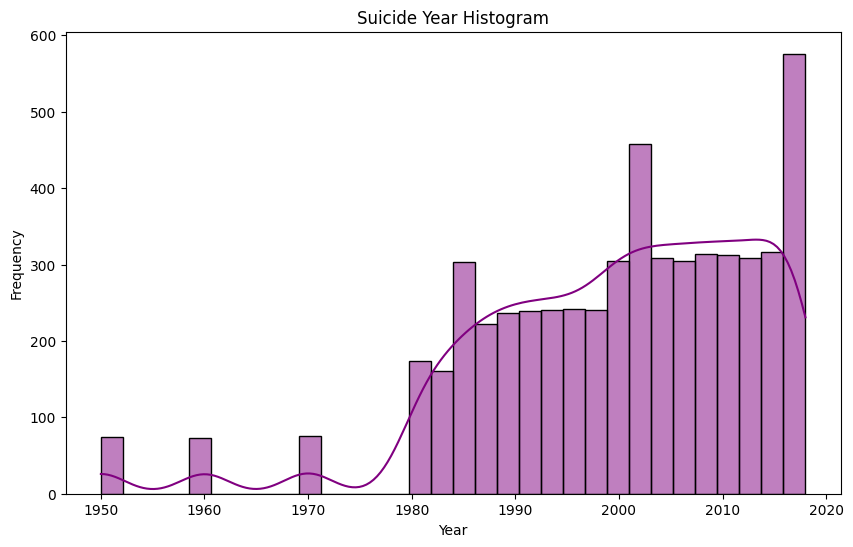

In [131]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data1['YEAR'], kde=True, color='purple')
plt.title('Suicide Year Histogram')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

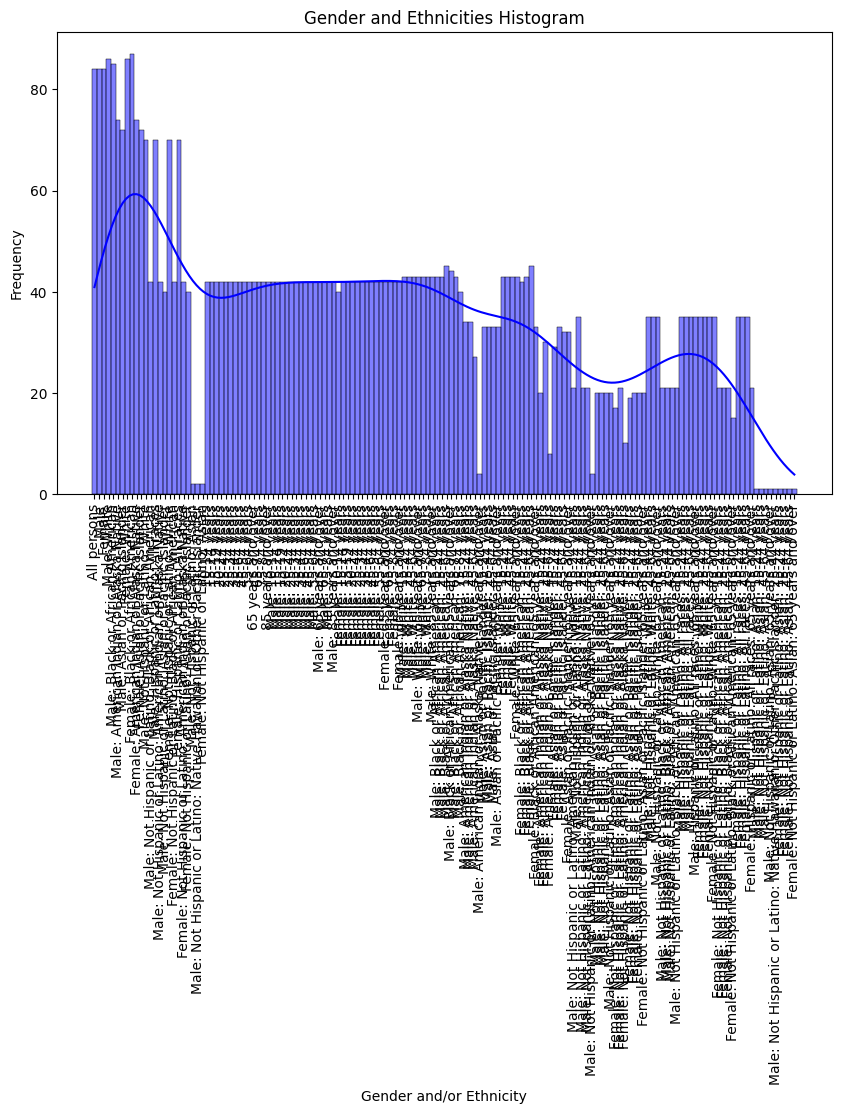

In [132]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data1['STUB_LABEL'], kde=True, color='blue')
plt.title('Gender and Ethnicities Histogram')
plt.xlabel('Gender and/or Ethnicity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

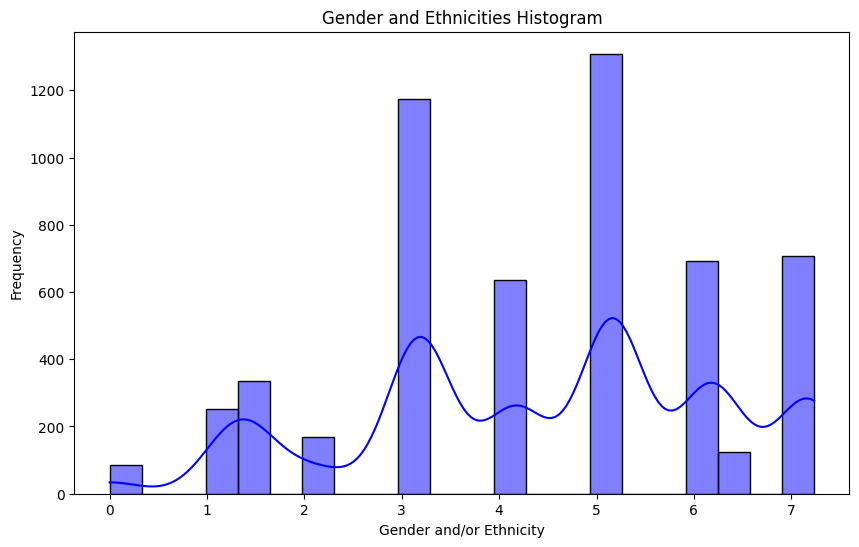

In [133]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data1['STUB_LABEL_NUM'], kde=True, color='blue')
plt.title('Gender and Ethnicities Histogram')
plt.xlabel('Gender and/or Ethnicity')
plt.ylabel('Frequency')
plt.show()

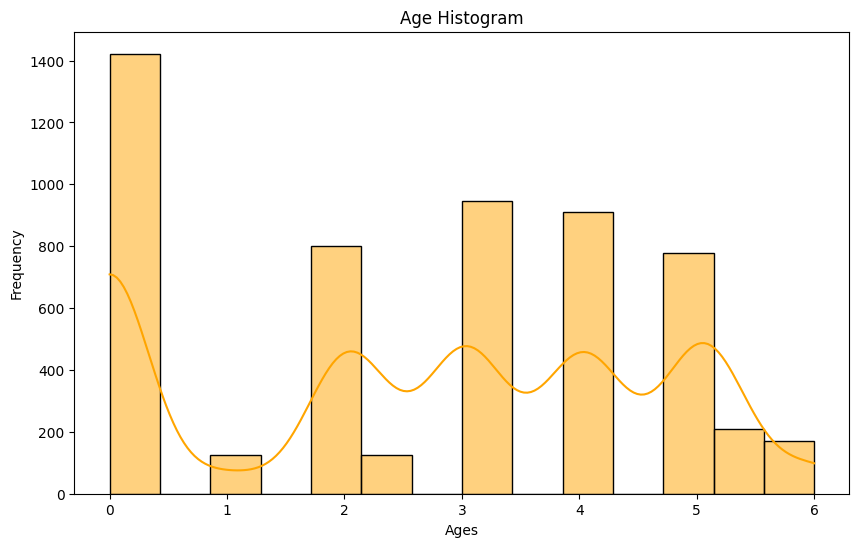

In [134]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data1['AGE_NUM'], kde=True, color='orange')
plt.title('Age Histogram')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

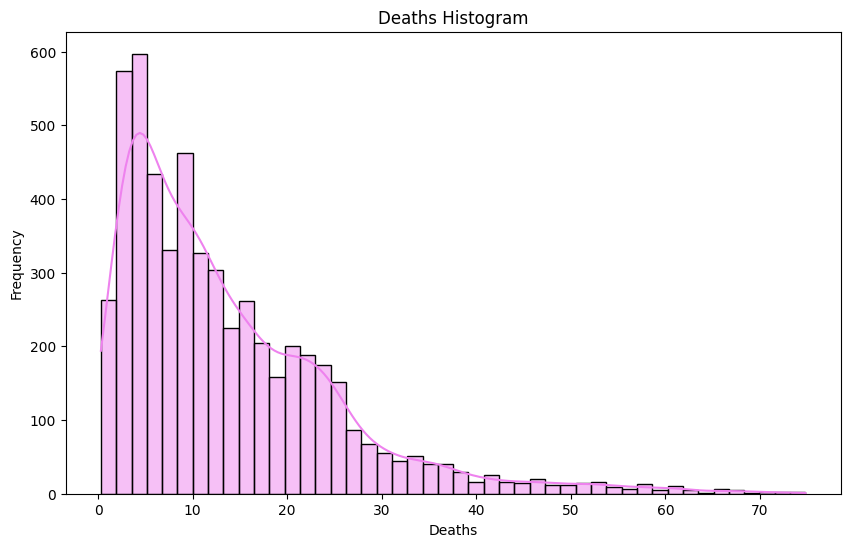

In [135]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data1['ESTIMATE'], kde=True, color='violet')
plt.title('Deaths Histogram')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()

In [138]:
# mean for variable
mean_year = data1['YEAR'].mean()
print('The mean of the year of the suicide analysis:', mean_year )

# mode for variable
mode_year = data1['YEAR'].mode().values[0]
print('The mode of the year of the suicide analysis:', mode_year)

# spread for variable
spread_year = data1['YEAR'].max() - data1['YEAR'].min()
print('The spread of the year of the suicide analysis:', spread_year)

# tails for variable
tails_year = data1['YEAR'].skew()
print('The tails of the year of the suicide analysis:', tails_year)


The mean of the year of the suicide analysis: 1999.6779722830051
The mode of the year of the suicide analysis: 2018
The spread of the year of the suicide analysis: 68
The tails of the year of the suicide analysis: -1.0144299764082412


In [139]:
# mean for variable
mean_gender = data1['STUB_LABEL_NUM'].mean()
print('The mean of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value.', mean_gender )

# mode for variable
mode_gender = data1['STUB_LABEL_NUM'].mode().values[0]
print('The mode of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value.', mode_gender)

# spread for variable
spread_gender = data1['STUB_LABEL_NUM'].max() - data1['YEAR'].min()
print('The spread of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value.', spread_gender)

# tails for variable
tails_gender = data1['STUB_LABEL_NUM'].skew()
print('The tails of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value.', tails_gender)

The mean of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value. 4.456998924142961
The mode of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value. 4.22
The spread of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value. -1942.765
The tails of the Stub Label would be undifined since it is a string. Instead, I used Stub_Label_Num. Which gives each stub label a value. -0.3161117804231763


In [140]:
# mean for variable
mean_age = data1['AGE_NUM'].mean()
print('The mean of the age groups that were included in this analysis:', mean_age )

# mode for variable
mode_age = data1['AGE_NUM'].mode().values[0]
print('The mode of the age groups that were included in this analysis:', mode_age)

# spread for variable
spread_age = data1['AGE_NUM'].max() - data1['AGE_NUM'].min()
print('The spread of the age groups that were included in this analysis::', spread_age)

# tails for variable
tails_age = data1['AGE_NUM'].skew()
print('The tails of the age groups that were included in this analysis:', tails_age)

The mean of the age groups that were included in this analysis: 2.6583515681983956
The mode of the age groups that were included in this analysis: 0.0
The spread of the age groups that were included in this analysis:: 6.0
The tails of the age groups that were included in this analysis: -0.12683518975878905


In [141]:
# mean for variable
mean_count = data1['ESTIMATE'].mean()
print('The mean of all suicides that were included in this analysis:', mean_count )

# mode for variable
mode_count = data1['ESTIMATE'].mode().values[0]
print('The mode of all suicides that were included in this analysis:', mode_count)

# spread for variable
spread_count = data1['ESTIMATE'].max() - data1['AGE_NUM'].min()
print('The spread of all suicides that were included in this analysis::', spread_count)

# tails for variable
tails_count = data1['ESTIMATE'].skew()
print('The tails of all suicides that were included in this analysis:', tails_count)

The mean of all suicides that were included in this analysis: 13.709810357403356
The mode of all suicides that were included in this analysis: 4.3
The spread of all suicides that were included in this analysis:: 74.8
The tails of all suicides that were included in this analysis: 1.6510512674178288


PMF for Scenario1:
PMF for Scenario2:


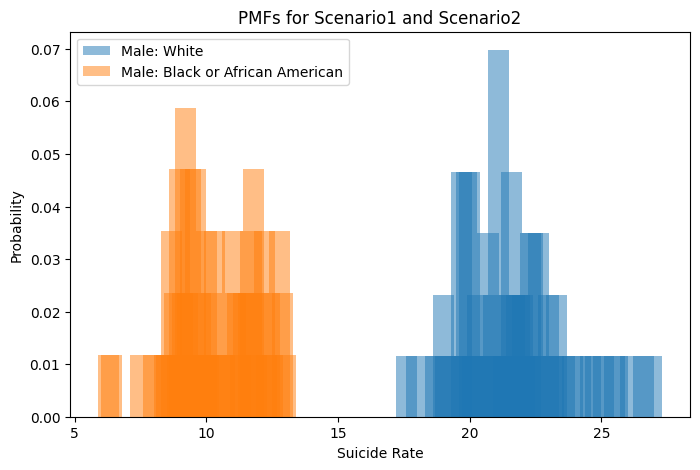

In [142]:
# PMF comparison
# Calculate PMF for suicides based on the first scenario
pmf_scenario1 = data1[data1['STUB_LABEL'] == 'Male: White']['ESTIMATE'].value_counts(normalize=True)
print("PMF for Scenario1:")

# Calculate PMF for suicides based on the second scenario
pmf_scenario2 = data1[data1['STUB_LABEL'] == 'Male: Black or African American']['ESTIMATE'].value_counts(normalize=True)
print("PMF for Scenario2:")

# Plotting the PMFs
plt.figure(figsize=(8, 5))
plt.bar(pmf_scenario1.index, pmf_scenario1.values, label='Male: White', alpha=0.5)
plt.bar(pmf_scenario2.index, pmf_scenario2.values, label='Male: Black or African American', alpha=0.5)
plt.xlabel('Suicide Rate')
plt.ylabel('Probability')
plt.title('PMFs for Scenario1 and Scenario2')
plt.legend()
plt.show()

In [143]:
# Create a probability distribution (e.g., Normal distribution)
mu = mean_age  # mean
sigma = 1  # standard deviation
dist = stats.norm(mu, sigma)

# Compute the CDF for each x-value
cdf_values = dist.cdf(data1['AGE_NUM'])

# Print the computed CDF values
for x, cdf in zip(data1['AGE_NUM'], cdf_values):
    print(f"CDF at x={x}: {cdf}")


CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 0.00392619658254685
CDF at x=0.0: 

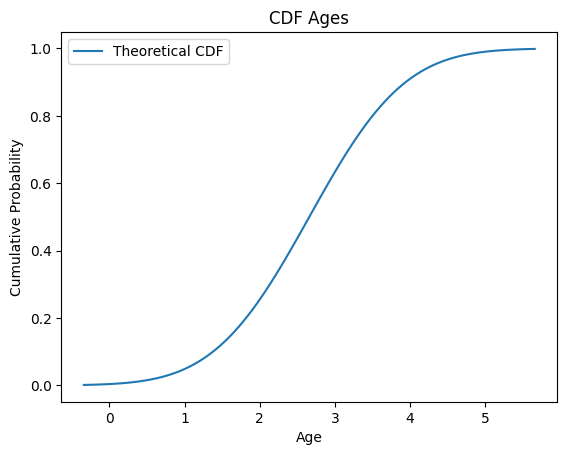

In [144]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.cdf(x, mu, sigma)

# plot CDF
plt.plot(x, y, label='Theoretical CDF')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('CDF Ages')
plt.legend()

# Display the plot
plt.show()

In [145]:
# Calculate the 75th percentile
percentile_50 = np.percentile(data1["AGE_NUM"], 50)

print("75th percentile:", percentile_50)

# Calculate the 75th percentile
percentile_75 = np.percentile(data1["AGE_NUM"], 75)

print("75th percentile:", percentile_75)

75th percentile: 3.0
75th percentile: 4.1


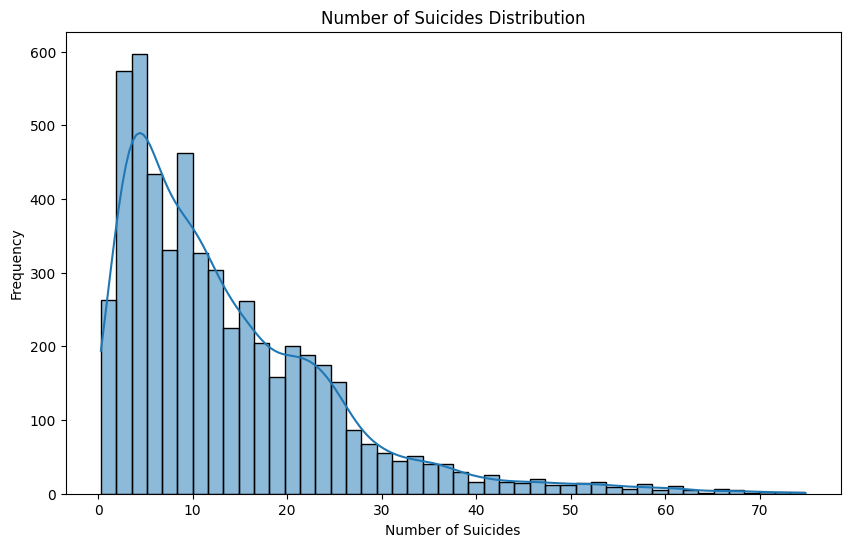

In [146]:
# Analytical distribution 
plt.figure(figsize=(10, 6))
sns.histplot(data1['ESTIMATE'], kde=True)
plt.title('Number of Suicides Distribution')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()

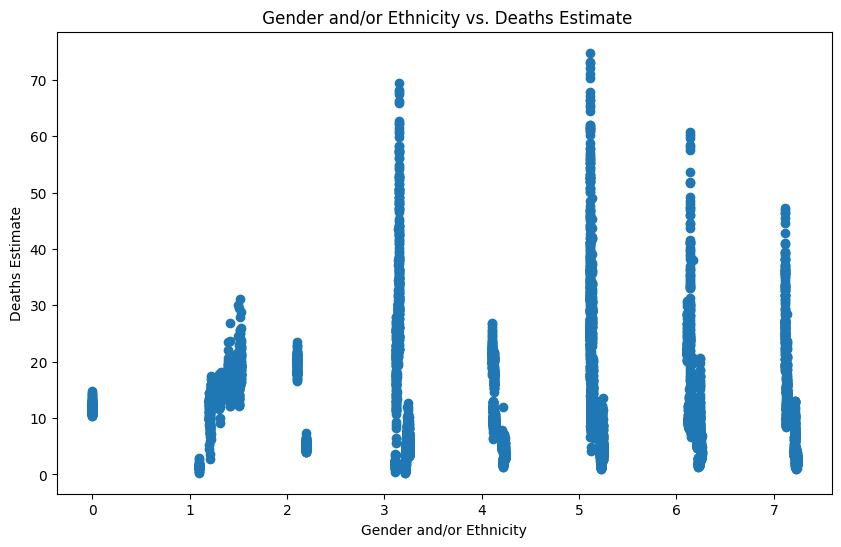

Covariance: -1.4779498508332836
Pearson's Correlation Coefficient: -0.06975629728489016


In [147]:
# Extract the variables from the dataset
gender = data1['STUB_LABEL_NUM'].dropna()
deaths_estimate = data1['ESTIMATE']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gender, deaths_estimate)
plt.title(' Gender and/or Ethnicity vs. Deaths Estimate')
plt.xlabel('Gender and/or Ethnicity')
plt.ylabel('Deaths Estimate')
plt.show()

# Calculate covariance
covariance = np.cov(gender, deaths_estimate)[0, 1]
print("Covariance:", covariance)

# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(gender, deaths_estimate)[0, 1]
print("Pearson's Correlation Coefficient:", correlation_coefficient)


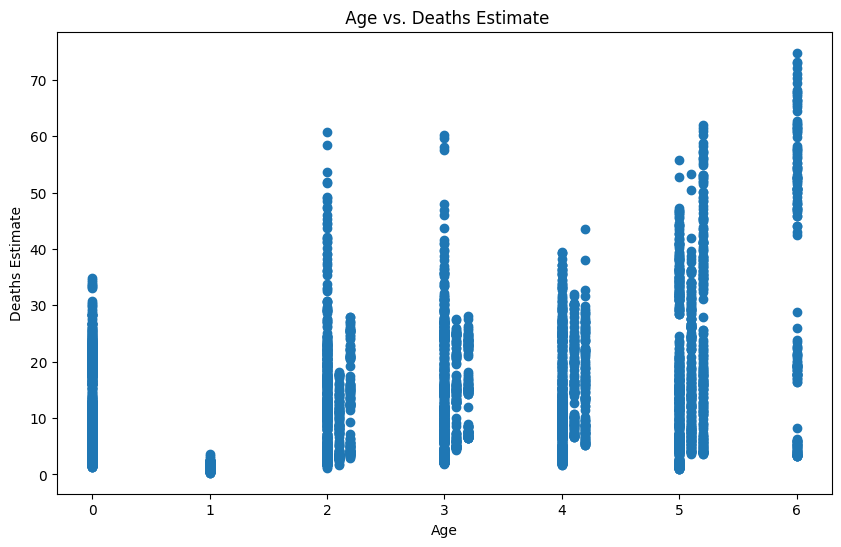

Covariance: 7.215964013428947
Pearson's Correlation Coefficient: 0.3256932701821782


In [148]:
# Extract the variables from the dataset
age = data1['AGE_NUM'].dropna()
deaths_estimate = data1['ESTIMATE']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, deaths_estimate)
plt.title(' Age vs. Deaths Estimate')
plt.xlabel('Age')
plt.ylabel('Deaths Estimate')
plt.show()

# Calculate covariance
covariance = np.cov(age, deaths_estimate)[0, 1]
print("Covariance:", covariance)

# Calculate Pearson's correlation coefficient
correlation_coefficient = np.corrcoef(age, deaths_estimate)[0, 1]
print("Pearson's Correlation Coefficient:", correlation_coefficient)

In [149]:
# Add a constant term for the intercept
gender_with_intercept = sm.add_constant(gender)

# Fit the linear regression model
model = sm.OLS(deaths_estimate, gender_with_intercept)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ESTIMATE   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     26.81
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           2.33e-07
Time:                        12:22:30   Log-Likelihood:                -21177.
No. Observations:                5484   AIC:                         4.236e+04
Df Residuals:                    5482   BIC:                         4.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.6612      0.408     38.

In [150]:
# Add a constant term for the intercept
age_with_intercept = sm.add_constant(age)

# Fit the linear regression model
model = sm.OLS(deaths_estimate, age_with_intercept)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ESTIMATE   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     650.5
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          1.08e-135
Time:                        12:22:33   Log-Likelihood:                -20882.
No. Observations:                5484   AIC:                         4.177e+04
Df Residuals:                    5482   BIC:                         4.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5131      0.251     33.864      0.0